## Step 1: Reading and Understanding the Data

In [197]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [198]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [199]:
# to read the csv file
day=pd.read_csv("day.csv")

In [200]:
# to print first 5 line from the csv file
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [201]:
# to get the shape about columns
day.shape

(730, 16)

In [202]:
# to get the info about columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see there no null values

In [203]:
# to get more info about columns
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [204]:
# dropping unwated columns
day=day.drop(['instant','casual','registered','dteday'],axis=1)

In [205]:
# Encoding season column
day.season = day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [206]:
# Encoding month column
day.mnth = day.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [207]:
# Encoding weathersit column
day.weathersit = day.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [208]:
# Encoding weekday column
day.weekday = day.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1400x2800 with 0 Axes>

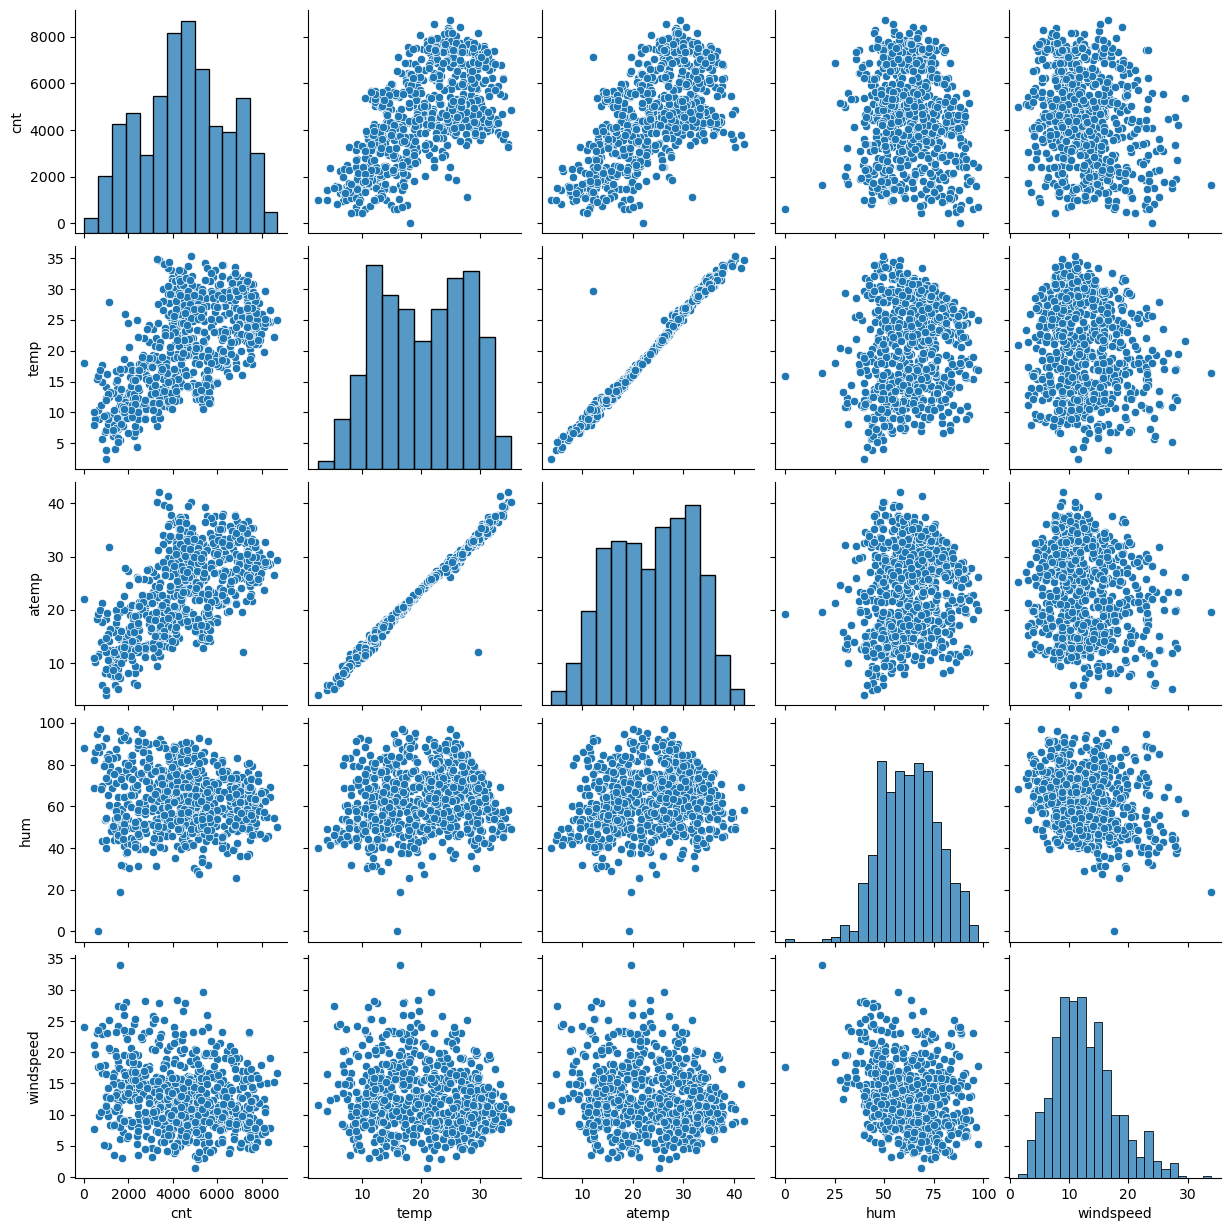

In [210]:
plt.figure(figsize = (14,28))
sns.pairplot(data=day,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- From the above plots we can see that temp and atemp are having high correlation and have a linear relationship

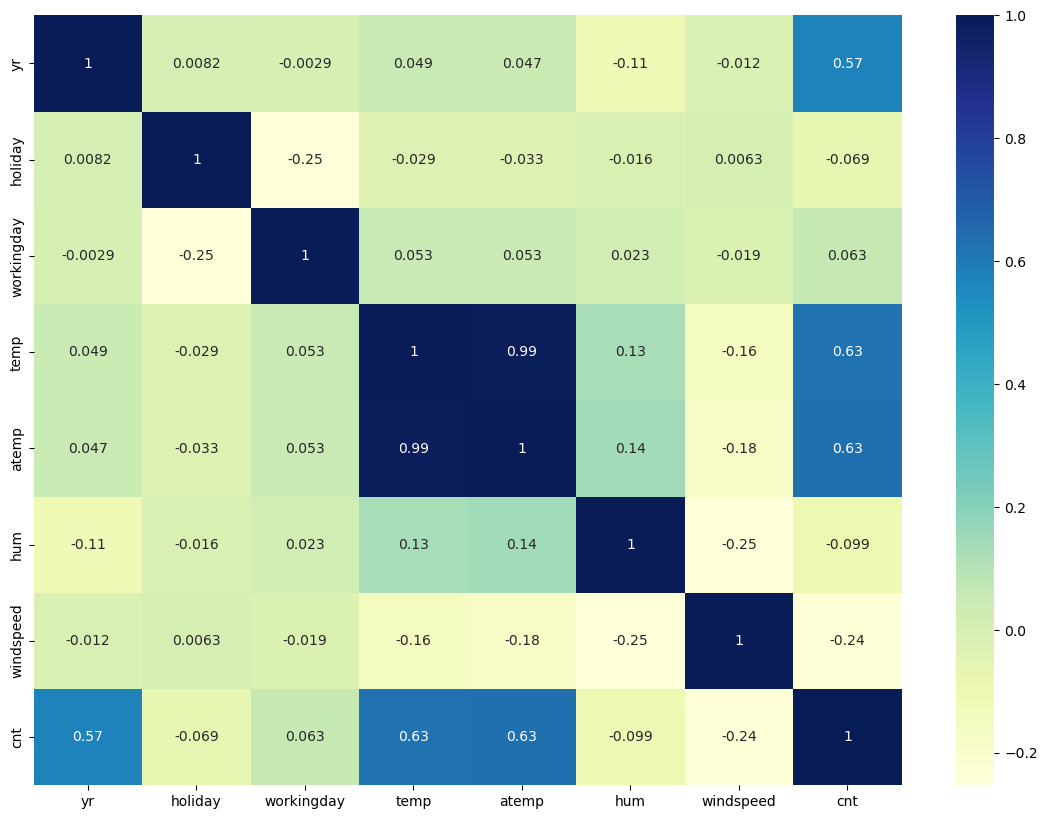

In [211]:
#Heat map for correlation between numeric variables 
plt.figure(figsize=(14,10))
sns.heatmap(day.corr(),cmap="YlGnBu",annot=True)
plt.show()

As you might have noticed, `temp` and `atemp` seems to the correlated to `cnt` the most.

<Axes: xlabel='weathersit', ylabel='cnt'>

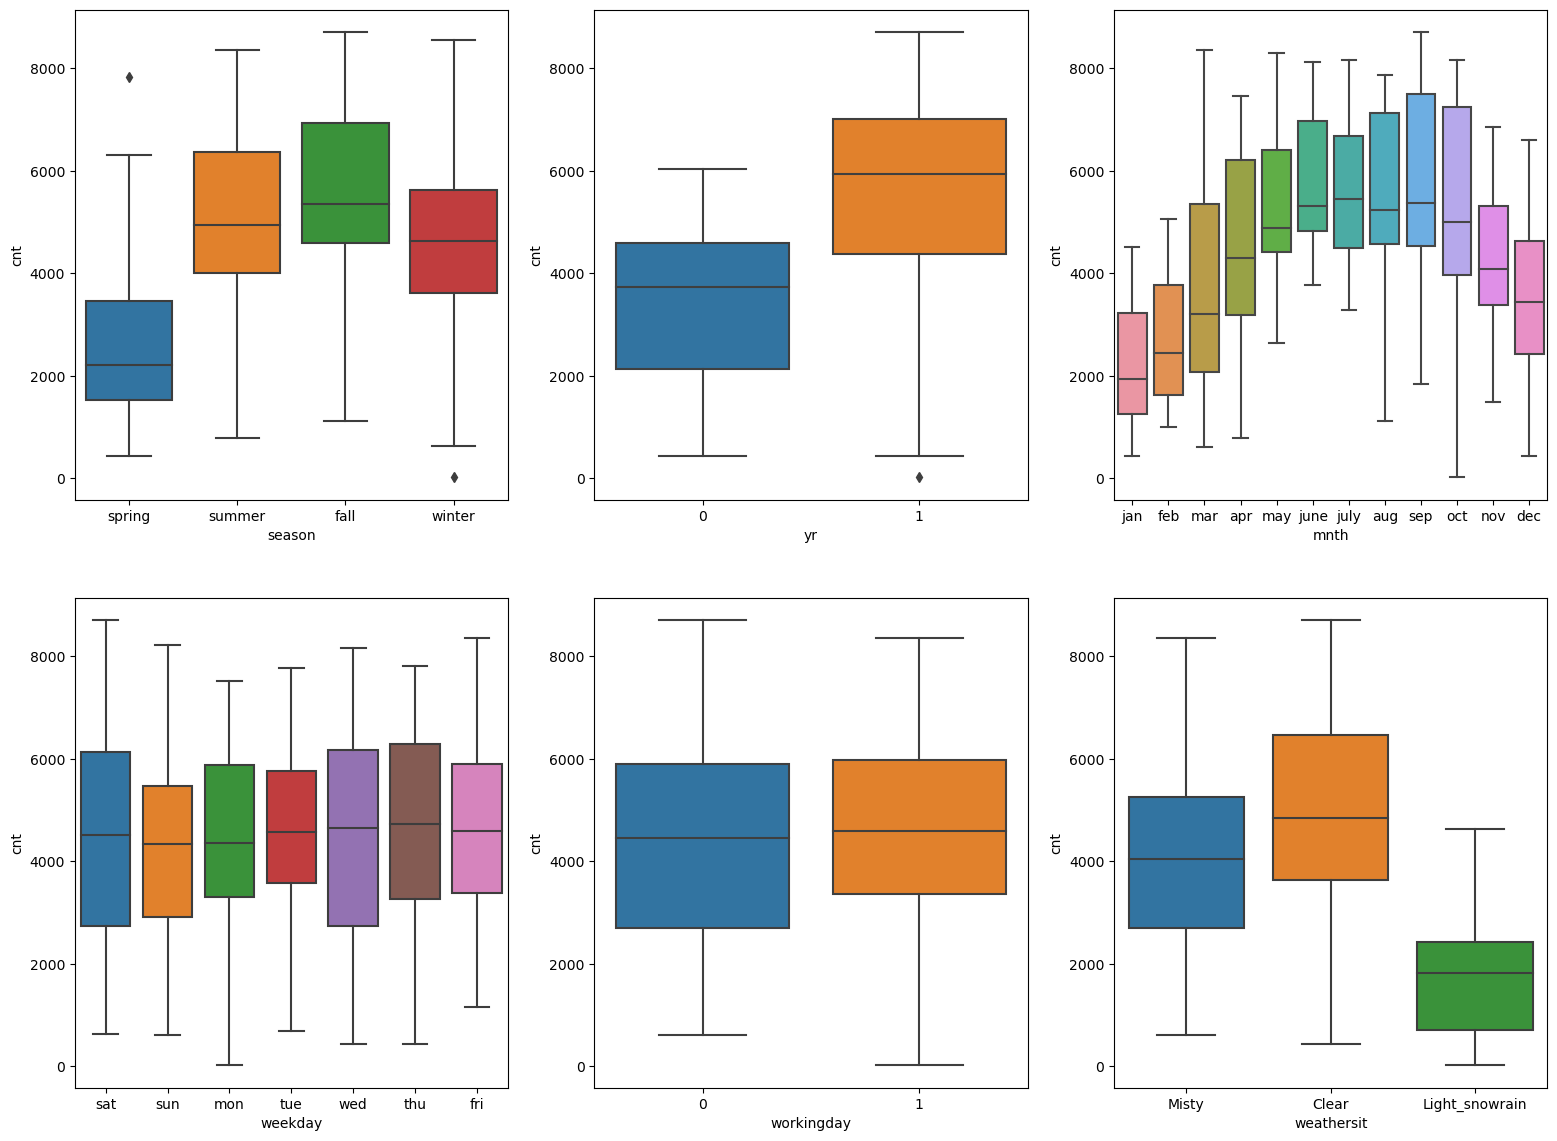

In [212]:
#visualising the categorical variables

plt.figure(figsize=(19,14))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=day)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=day)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=day)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=day)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=day)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=day)

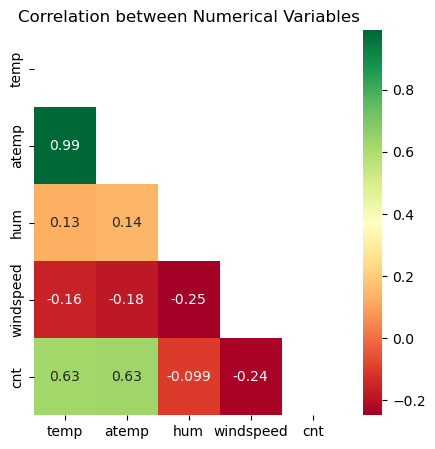

In [213]:
# Checking correlation between the numerical variables

plt.figure(figsize = (5,5))
matrix = np.triu(day[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(day[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

It is clear that temp and atemp has linear relationship. So we need to keep only one.Baised on the VIF we will decide which one to keep

## Step 3: Data Preparation

In [214]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(day.mnth,drop_first=True)
weekdays_df=pd.get_dummies(day.weekday,drop_first=True)
weathersit_df=pd.get_dummies(day.weathersit,drop_first=True)
seasons_df=pd.get_dummies(day.season,drop_first=True)

In [215]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [216]:
#Contactinating the ndummy dfs to our main dfs
day_new=pd.concat([day,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [217]:
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [218]:
#Removing the unwanted columns as we have created the dummy variables
day_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [219]:
# checkingthe shape of new dataframe

day_new.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets


In [220]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(day_new, train_size = 0.7, random_state = 100)

In [221]:
# Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [222]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [223]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [224]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [225]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


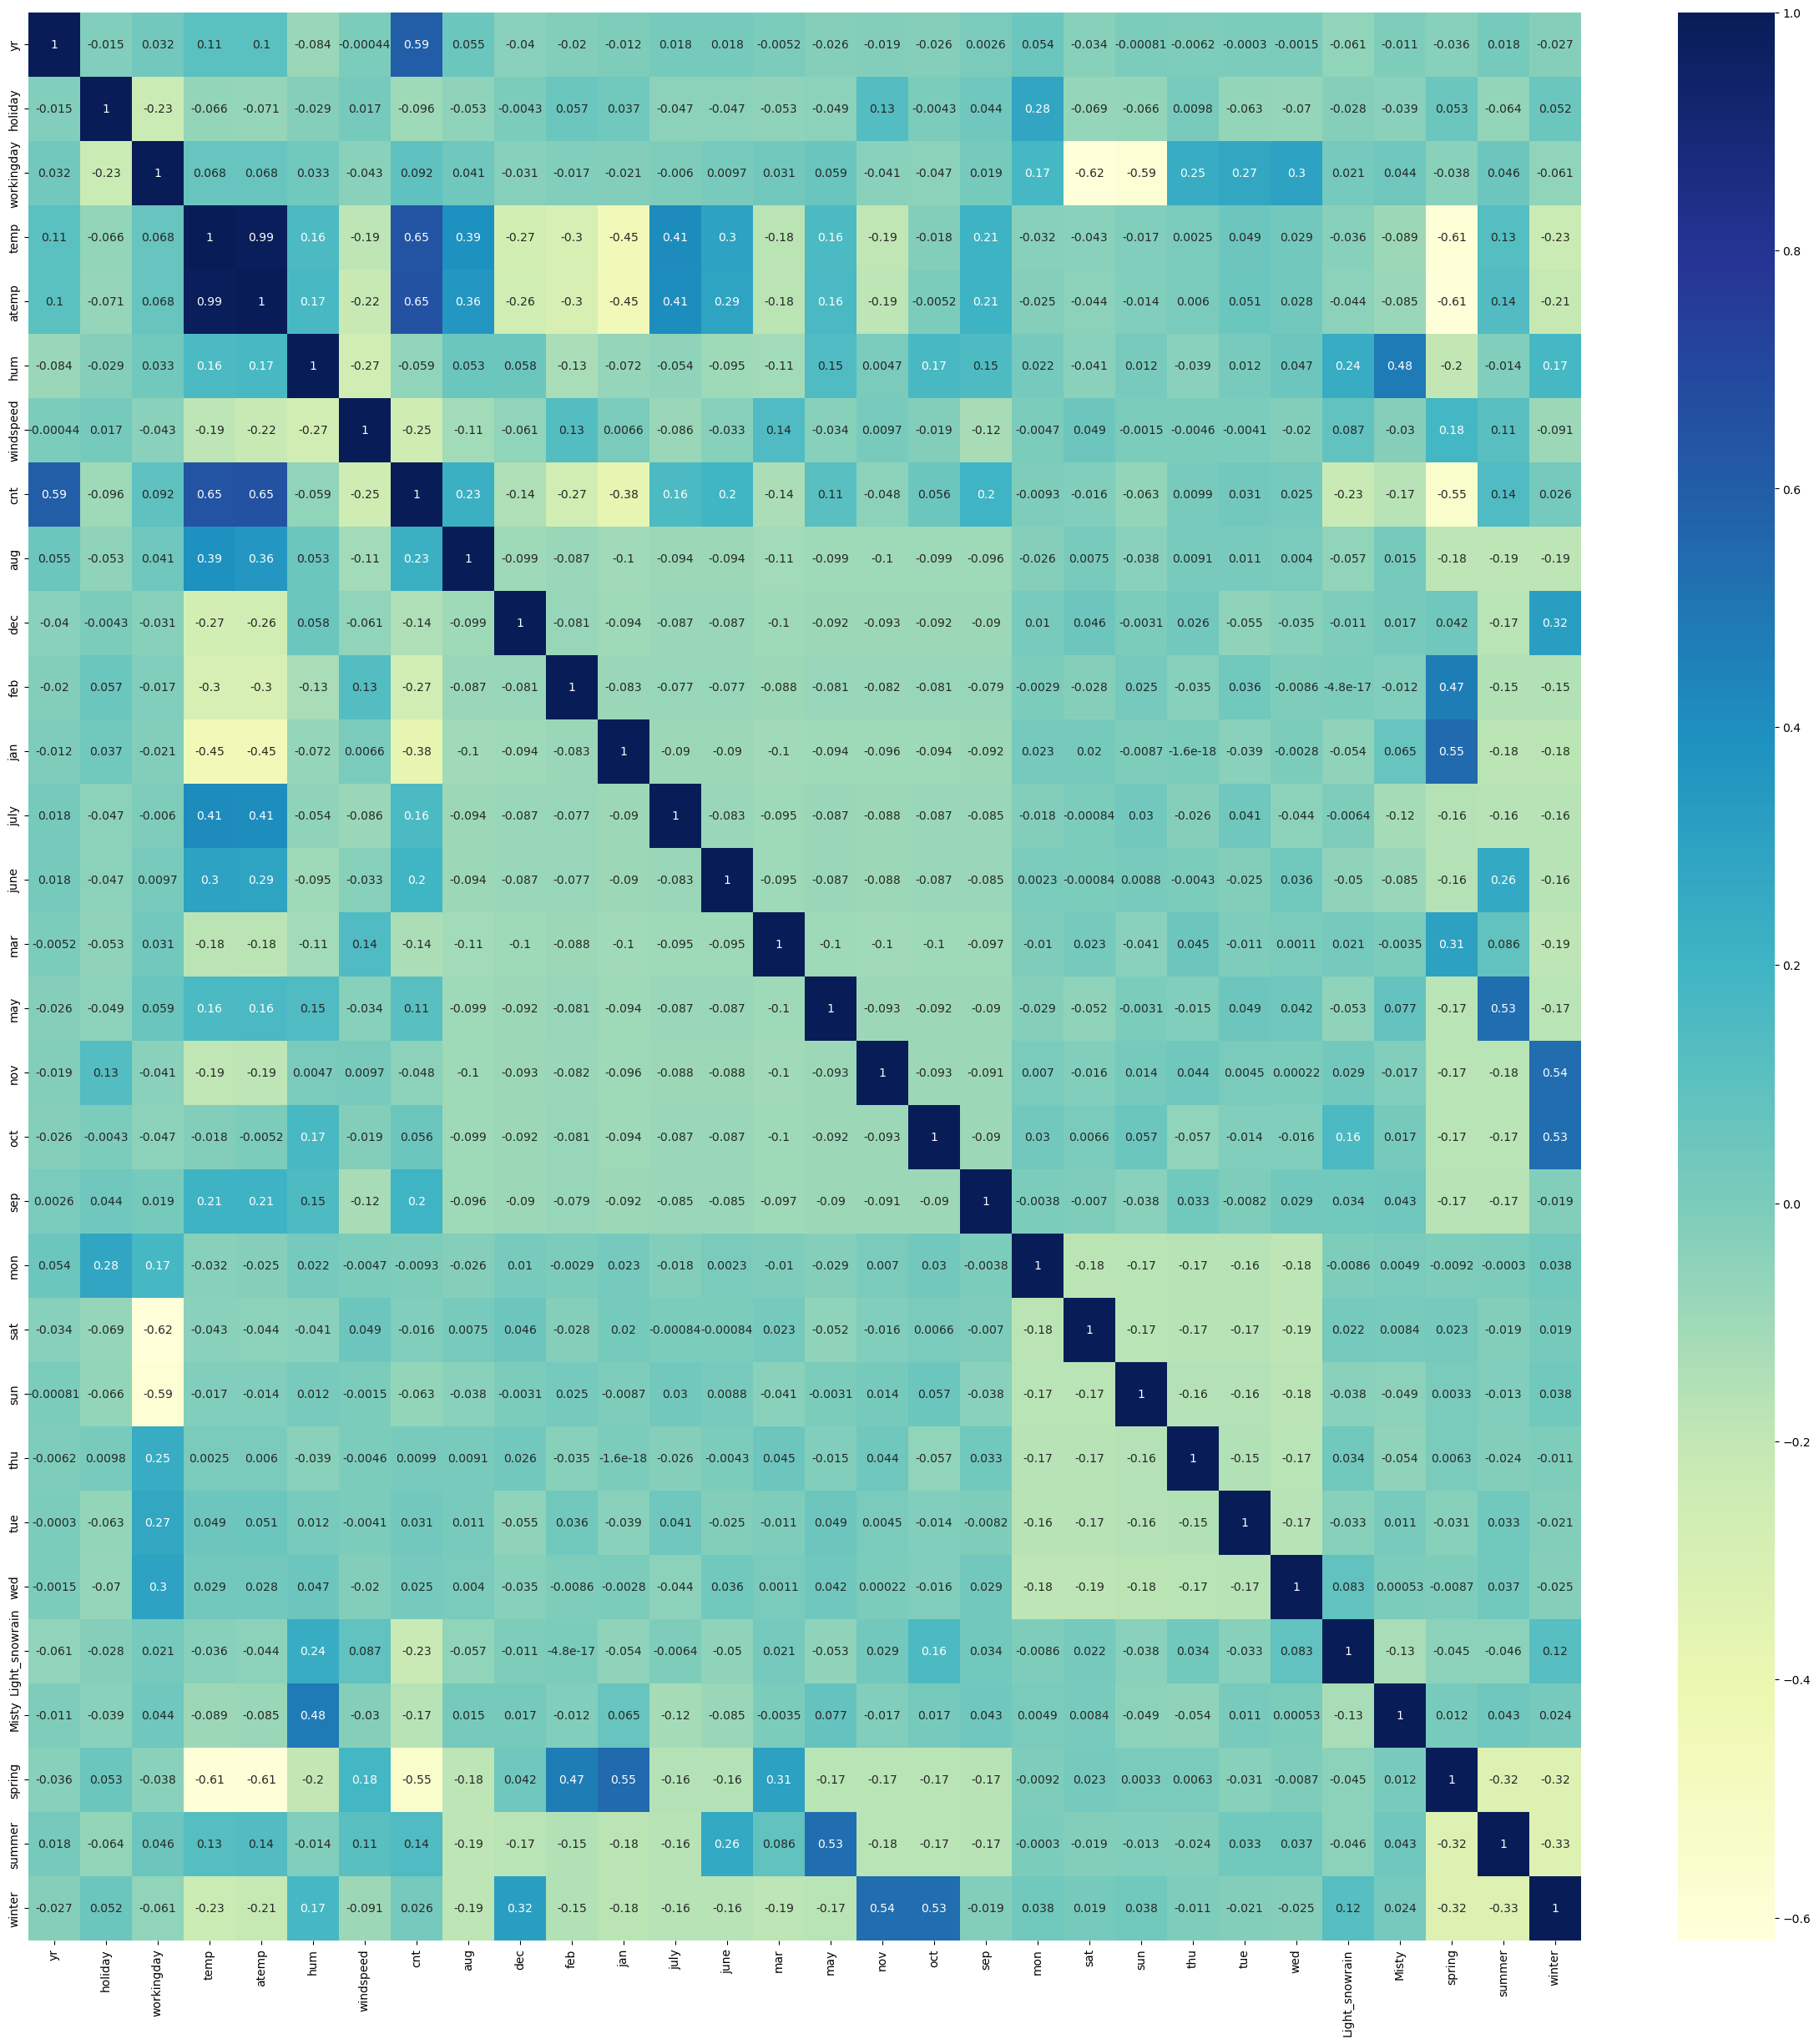

In [226]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

cnt have correlation with year variable,atemp and temp. Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

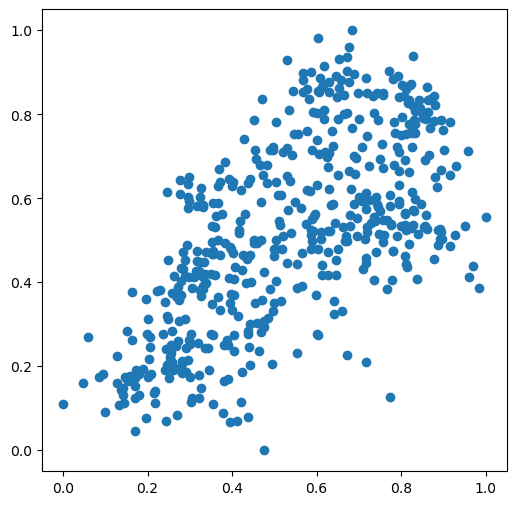

In [227]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [228]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [229]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [230]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', True, 1),
 ('dec', False, 3),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 6),
 ('june', False, 15),
 ('mar', False, 7),
 ('may', False, 5),
 ('nov', False, 4),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', False, 13),
 ('summer', True, 1),
 ('winter', True, 1)]

In [231]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'aug', 'jan',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'summer', 'winter'],
      dtype='object')


In [232]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'spring'],
      dtype='object')

In [233]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [234]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [235]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [176]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,34.00
9,sat,8.38
10,sun,8.20
1,holiday,2.24
3,temp,1.94
4,hum,1.88
14,winter,1.58
12,Misty,1.56
7,jan,1.55
13,summer,1.48


humidity has high VIF value.

In [236]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.01e-191
Time:                        20:24:25   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1727      0.023      7.

In [237]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,18.41
2,temp,11.43
4,windspeed,3.68
11,Misty,2.17
13,winter,2.05
0,yr,2.04
12,summer,1.96
5,aug,1.60
6,jan,1.55
7,sep,1.32


In [238]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.01e-191
Time:                        20:25:23   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2495      0.028      8.

In [239]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,3.42
0,yr,2.04
11,summer,1.89
4,aug,1.60
12,winter,1.57
10,Misty,1.55
6,sep,1.32
5,jan,1.23
7,sat,1.22


In [240]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          6.55e-189
Time:                        20:25:43   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1614      0.019      8.

In [241]:
# As sat shows high p values hence we can drop it
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,3.36
0,yr,2.04
10,summer,1.89
4,aug,1.60
11,winter,1.56
9,Misty,1.54
6,sep,1.32
5,jan,1.23
7,sun,1.17


In [242]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          6.83e-190
Time:                        20:26:23   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1635      0.019      8.

In [243]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,3.13
0,yr,2.00
9,summer,1.82
4,aug,1.59
8,Misty,1.49
10,winter,1.49
5,sep,1.31
6,sun,1.17
7,Light_snowrain,1.08


In [244]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          8.46e-190
Time:                        20:27:22   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -935.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1387      0.017      8.

In [245]:
# We can drop aug variable as it has high p-value
X_train_new = X_train_new.drop(['aug'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
8,summer,1.57
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.17
6,Light_snowrain,1.08
1,holiday,1.04


In [246]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          6.34e-189
Time:                        20:28:40   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1344      0.017      8.

We can have the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.F-Statistics value of 255.0 (which is greater than 1) and the p-value of 6.34e-189 i.e almost equals to zero, states that the overall model is significant

In [247]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.134431
yr                0.232752
holiday          -0.106683
temp              0.547114
windspeed        -0.153073
sep               0.099353
sun              -0.049842
Light_snowrain   -0.288321
Misty            -0.080555
summer            0.087801
winter            0.131138
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [248]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,1,0


In [249]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

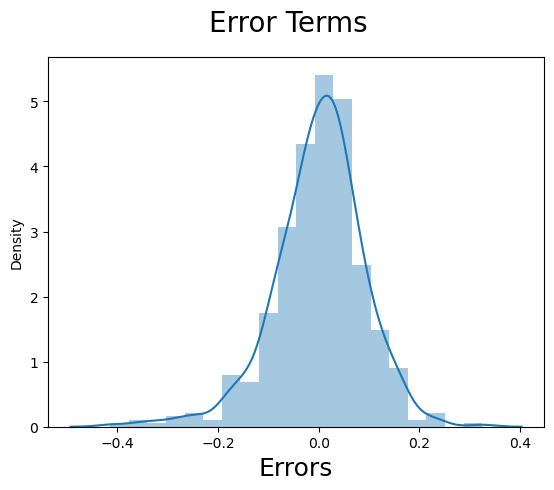

In [250]:
# Checking normanilty

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

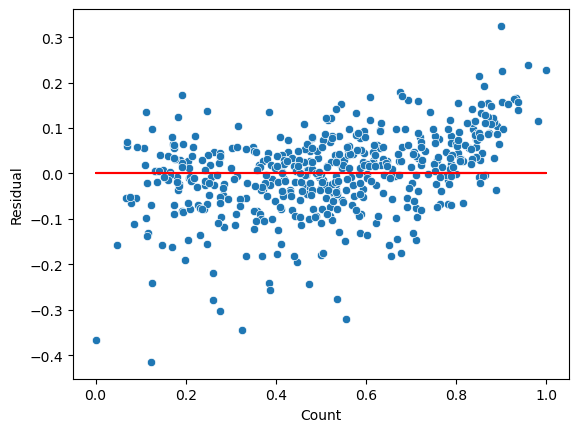

In [254]:
#Checking Homoscedasticity
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Step 7: Making Predictions Using the Final Model

In [256]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [257]:
y_test = df_test.pop('cnt')
X_test = df_test

In [258]:
cols = X_train_new.columns

X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [259]:
y_pred = lr_6.predict(X_test_lm_6)

In [260]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7965

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

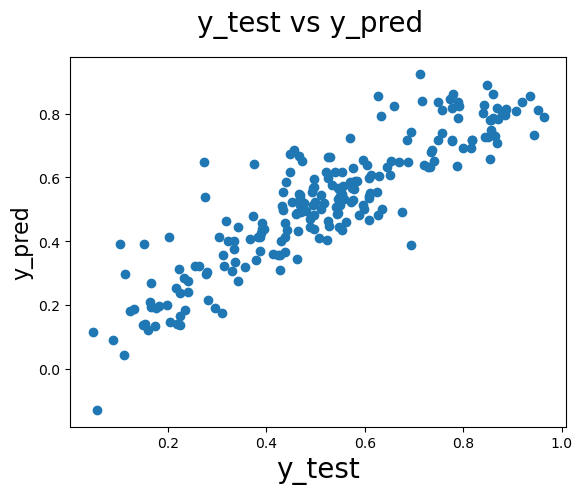

In [262]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 16) 

In [263]:
round(lr_6.params,4)

const             0.1344
yr                0.2328
holiday          -0.1067
temp              0.5471
windspeed        -0.1531
sep               0.0994
sun              -0.0498
Light_snowrain   -0.2883
Misty            -0.0806
summer            0.0878
winter            0.1311
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1344 + 0.2328  \times  year - 0.1067  \times  holiday + 0.5471 \times temp - 0.1531 \times windspeed + 0.0994 \times sep - 0.2883 \times Light snowrain - 0.0806 \times Misty - 0.0498 \times sun + 0.0878 \times summer + 0.1311 \times winter $

In [264]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7868


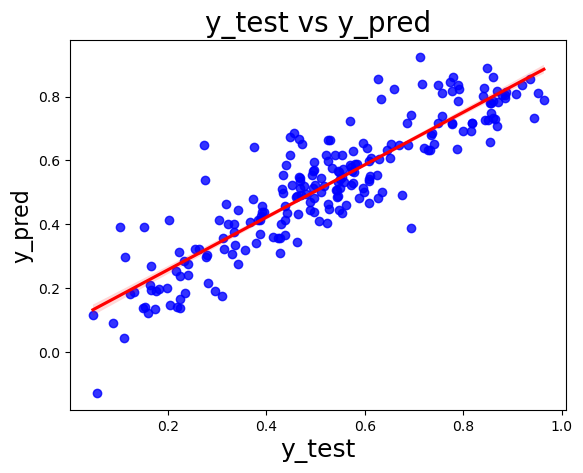

In [265]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.836
    - Test dataset R^2           : 0.7965
    - Train dataset Adjusted R^2 : 0.833    
    - Test dataset Adjusted R^2  : 0.7868

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, sun, summer and winter.